# Car Price Prediction with Machine Learning

Mean Squared Error: 12683093.852618095
R-squared: 0.8393406655590521


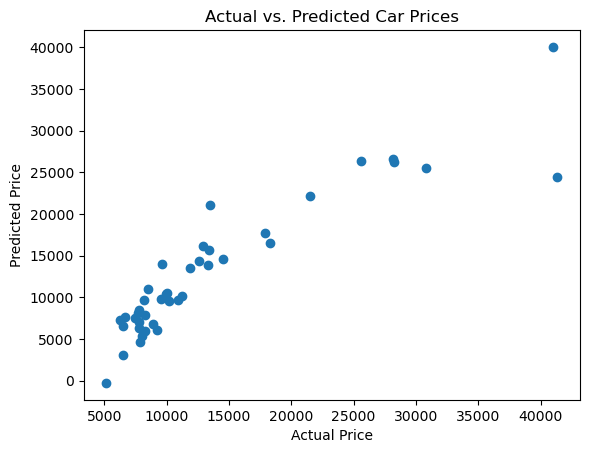

In [22]:
# TASK-3

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data from CSV
data = pd.read_csv("CarPrice_Assignment.csv")

# Extract car brand from CarName
data['CarBrand'] = data['CarName'].apply(lambda x: x.split()[0])

# Drop irrelevant columns (like car_ID and CarName)
data = data.drop(['car_ID', 'CarName'], axis=1)

# Convert categorical variables to numerical using Label Encoding
label_encoder = LabelEncoder()
categorical_cols = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'CarBrand']
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Splitting the data into features (X) and target (y)
X = data.drop('price', axis=1)
y = data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train a Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict car prices on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualize predicted vs. actual prices
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Car Prices")
plt.show()


